# Unsupervised Churn Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Read-In and Overview

In [61]:
#df = pd.read_excel("churn.xlsx")

In [3]:
#csv = df[:100000]
#csv.to_csv("churn.csv")

In [2]:
df = pd.read_csv("churn.csv",)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,musteriref,MailOptIn,smsoptIn,CinsiyetKod,siparişsayısı,ürünsayı,toplamtutar,ömür,aktifliksüresi,sonpasifsüre,...,BG,BU,CK1,CK4,CK6,CU1,CU4,CU6,ET,EV
0,118,1,1,E,12,929,16256.68,2622,2610,12,...,42,57,0,226,0,0,50,0,0,184
1,138,0,1,E,12,142,2863.13,2622,2483,139,...,26,0,0,36,0,11,31,0,0,4
2,226,0,1,K,2,37,845.25,2622,2546,76,...,14,0,0,0,0,0,15,0,0,0
3,238,0,1,K,9,346,9066.94,2622,2248,360,...,90,85,0,18,9,18,46,0,0,10
4,251,0,1,K,4,199,3691.80,2622,2351,206,...,8,24,6,32,0,0,0,0,0,72


In [3]:
test = df[:1000]

In [4]:
df.describe()

,musteriref,MailOptIn,smsoptIn,siparişsayısı,ürünsayı,toplamtutar,ömür,aktifliksüresi,sonpasifsüre,indirimli,...,BG,BU,CK1,CK4,CK6,CU1,CU4,CU6,ET,EV
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,294634.664780,0.667010,0.704260,8.613270,3.025445e+02,6.261988e+03,2067.490830,1542.892800,135.472550,141.362390,...,69.98660,36.139070,19.295050,39.86935,1.066750,15.725000,34.414930,0.990650,0.003070,4.056230
std,198221.716114,0.471285,0.456377,25.248333,4.345535e+03,7.692632e+04,276.401359,681.547516,110.666204,1819.876665,...,666.02536,673.325714,122.769943,609.36184,14.163985,91.801135,418.848744,13.750849,0.524694,66.349933
min,106.000000,0.000000,0.000000,1.000000,1.000000e+00,3.950000e+00,1512.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116832.000000,0.000000,0.000000,2.000000,2.200000e+01,5.389075e+02,1837.000000,1247.000000,35.000000,9.000000,...,1.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,272522.500000,1.000000,1.000000,4.000000,8.600000e+01,1.892775e+03,2104.000000,1712.000000,98.000000,40.000000,...,15.00000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,457509.500000,1.000000,1.000000,10.000000,2.770000e+02,5.696483e+03,2295.000000,2062.000000,229.000000,133.000000,...,61.00000,26.000000,3.000000,20.00000,0.000000,2.000000,18.000000,0.000000,0.000000,2.000000
max,698052.000000,1.000000,1.000000,6319.000000,1.265242e+06,2.225189e+07,2622.000000,2620.000000,366.000000,536689.000000,...,180626.00000,202331.000000,26758.000000,182551.00000,3602.000000,18481.000000,122080.000000,3061.000000,161.000000,20048.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
musteriref           100000 non-null int64
MailOptIn            100000 non-null int64
smsoptIn             100000 non-null int64
CinsiyetKod          100000 non-null object
siparişsayısı        100000 non-null int64
ürünsayı             100000 non-null int64
toplamtutar          100000 non-null float64
ömür                 100000 non-null int64
aktifliksüresi       100000 non-null int64
sonpasifsüre         100000 non-null int64
indirimli            100000 non-null int64
sepettekampanyalı    100000 non-null int64
BG                   100000 non-null int64
BU                   100000 non-null int64
CK1                  100000 non-null int64
CK4                  100000 non-null int64
CK6                  100000 non-null int64
CU1                  100000 non-null int64
CU4                  100000 non-null int64
CU6                  100000 non-null int64
ET                   100000

# Exploratory Data Analysis

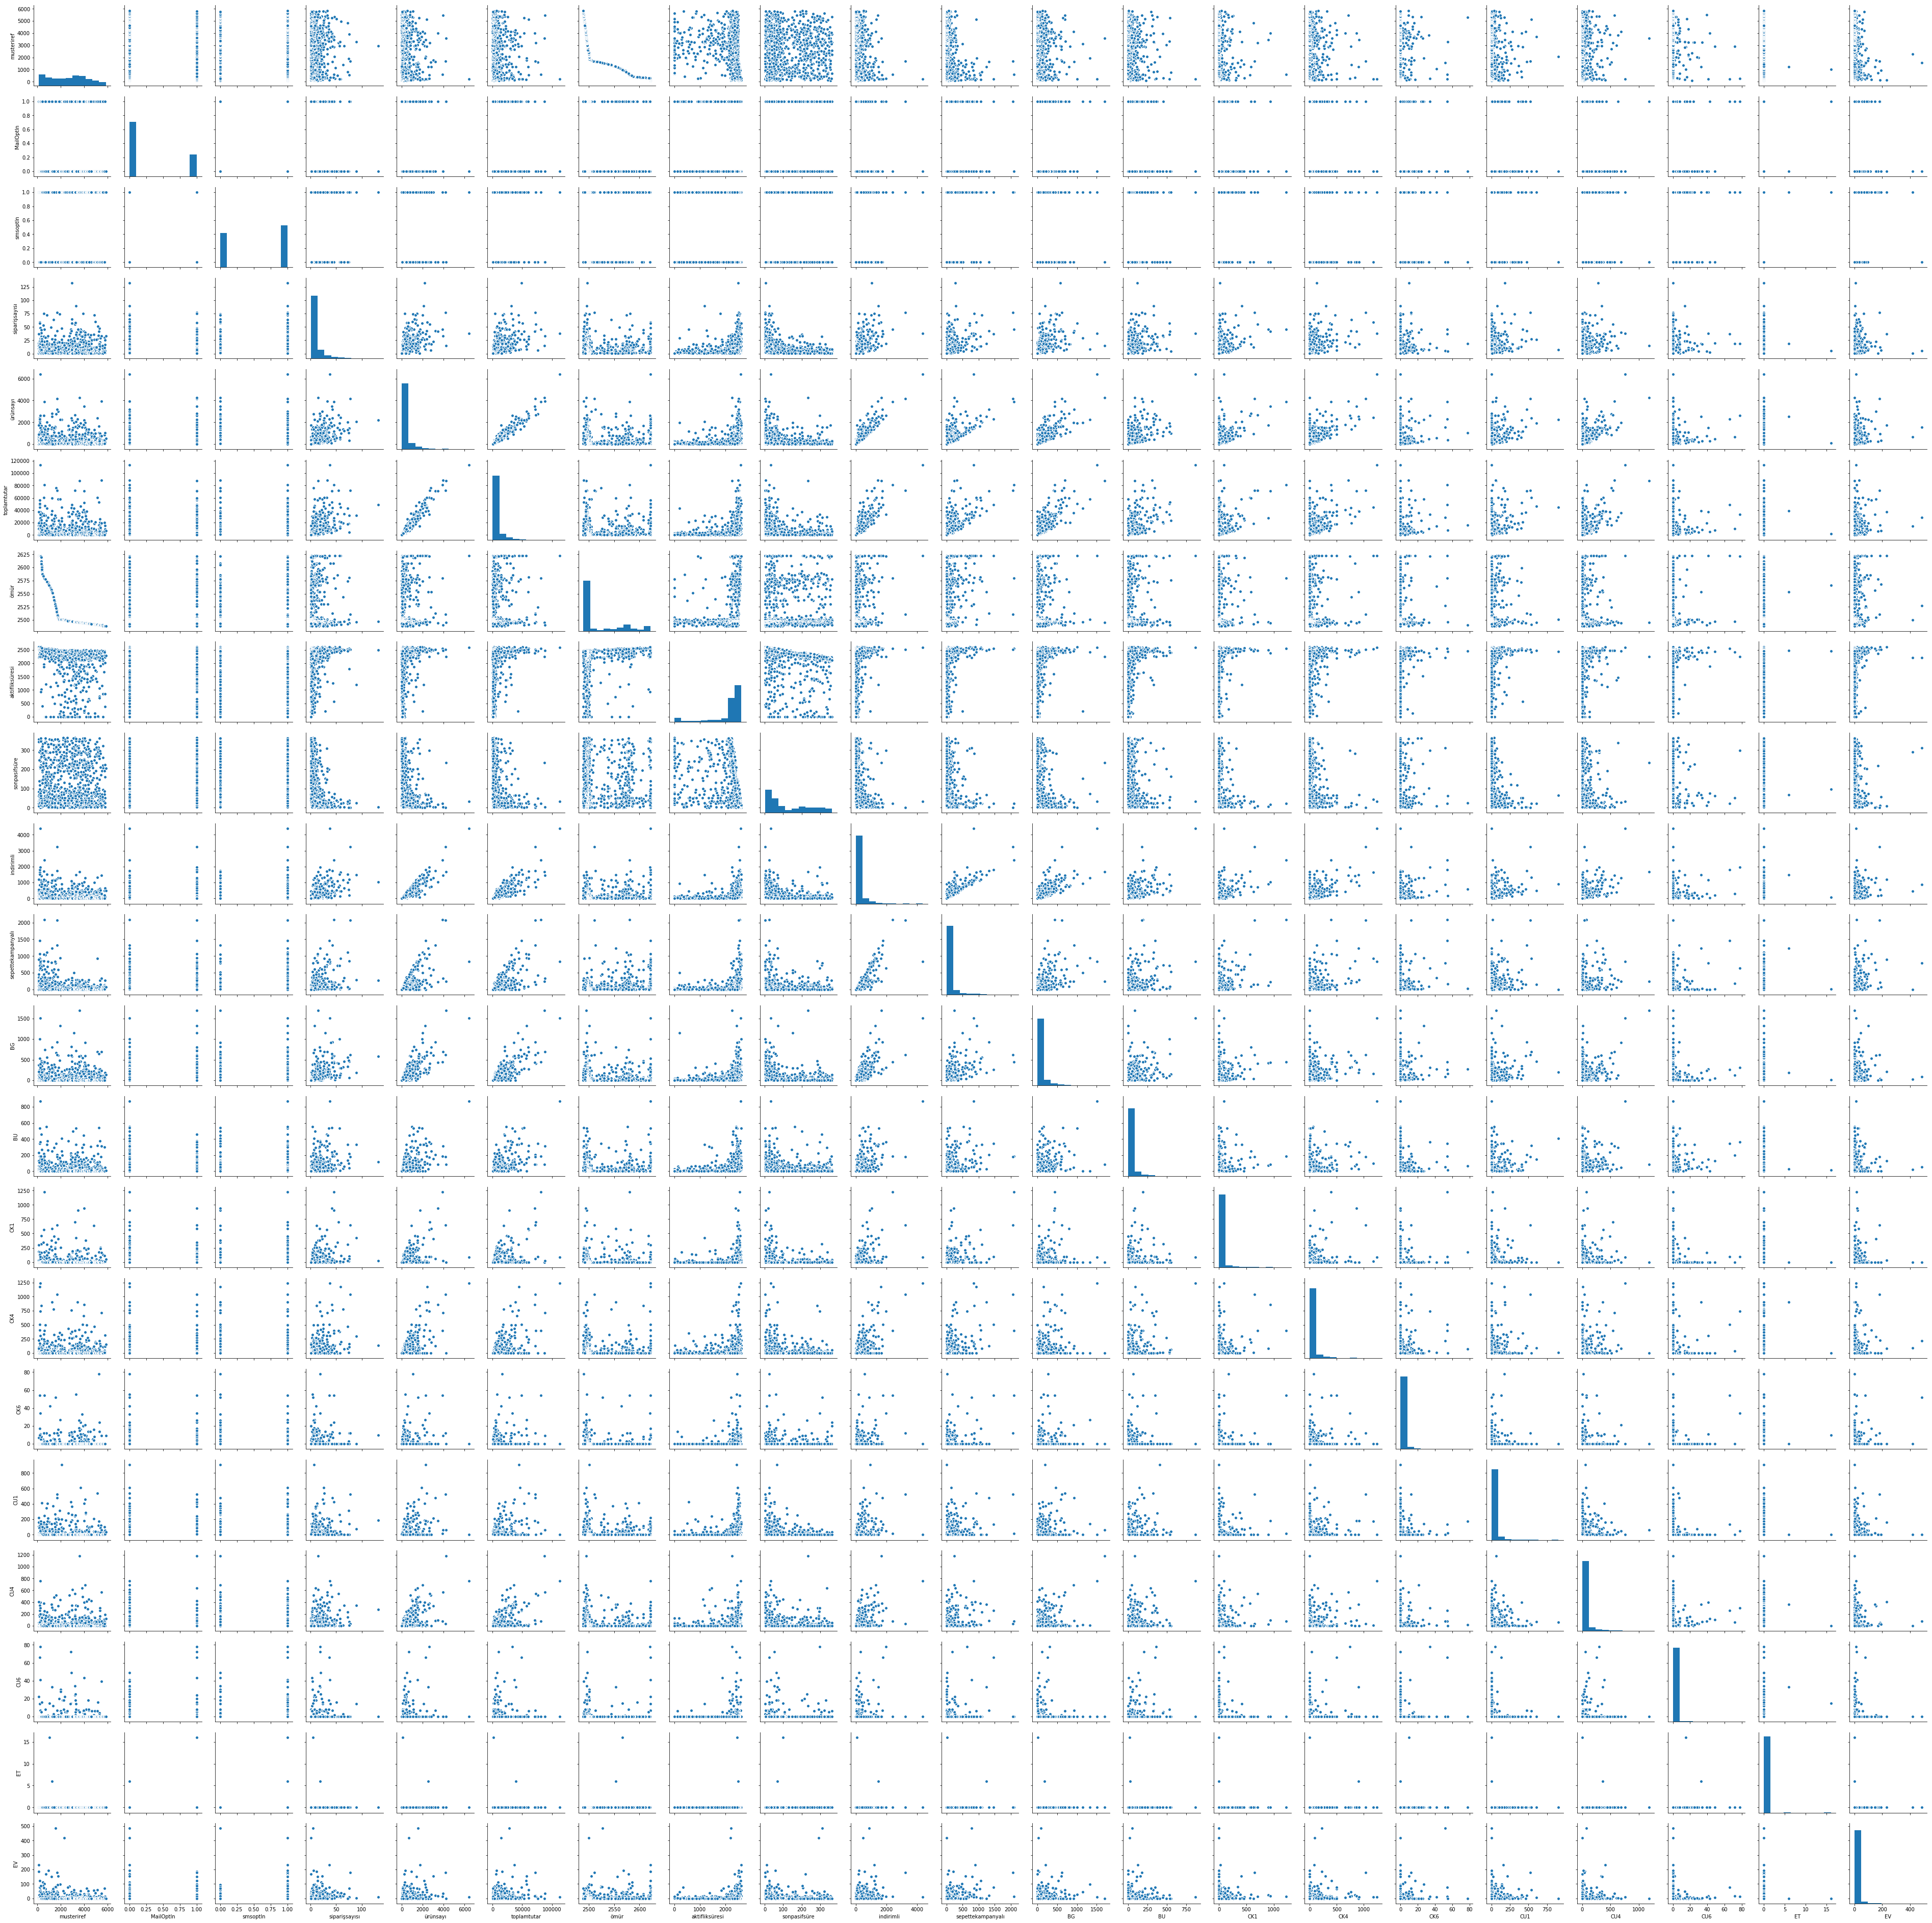

In [6]:
sns.pairplot(test)

Text(0.5,1,'Correlation Heatmap')

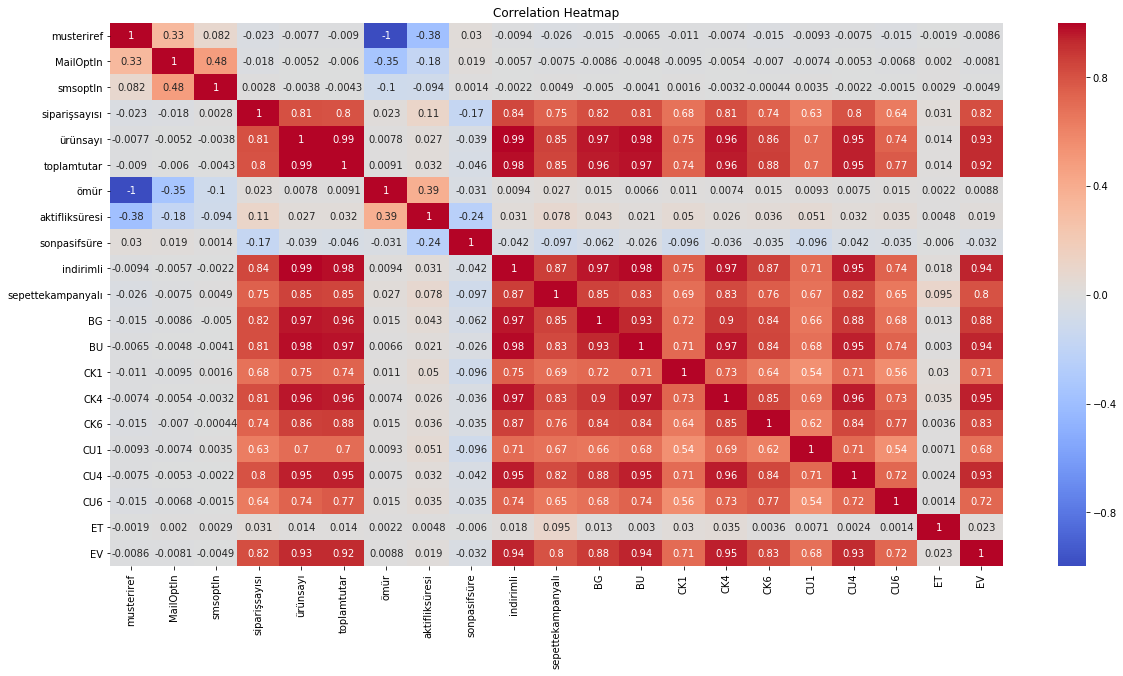

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
plt.title("Correlation Heatmap")

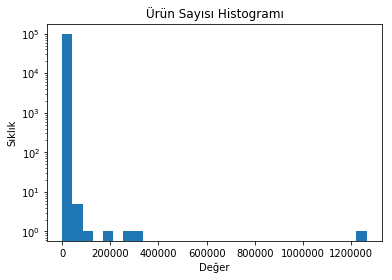

In [10]:
plt.hist(df["ürünsayı"],log=True,bins=30)
plt.title("Ürün Sayısı Histogramı")
plt.xlabel("Değer")
plt.ylabel("Sıklık")

fig = plt.gcf()

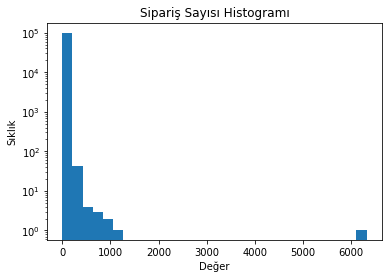

In [11]:
plt.hist(df["siparişsayısı"],log=True,bins=30)
plt.title("Sipariş Sayısı Histogramı")
plt.xlabel("Değer")
plt.ylabel("Sıklık")

fig = plt.gcf()

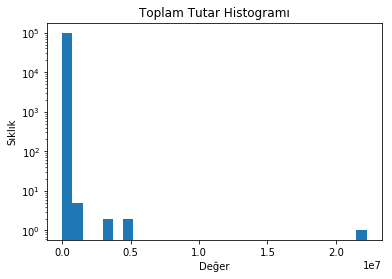

In [12]:
plt.hist(df["toplamtutar"],log=True,bins=30)
plt.title("Toplam Tutar Histogramı")
plt.xlabel("Değer")
plt.ylabel("Sıklık")

fig = plt.gcf()

# Data Preprocessing
## Imputation

In [10]:
#Cinsiyet kolonu yeterli veri olmamasından dolayı gürültü yaratmamak için impute edildi.
df.drop(["CinsiyetKod"],axis=1,inplace=True)

## Scaling

In [11]:
# RobustScaler ile nümerik verilere scaling uygulanması
from sklearn.preprocessing import RobustScaler
# Scale edilecek feature listesi
toScale = [["siparişsayısı","ürünsayı","toplamtutar","ömür","aktifliksüresi",
              "sonpasifsüre","indirimli","sepettekampanyalı","BG","BU","CK1",
              "CK4","CK6","CU1","CU4","CU6","ET","EV"]]

scaler = RobustScaler()
# Scale edilmeyecek featurelar çıkarılarak scaling uygulanması
scaler.fit(df.drop(["musteriref","MailOptIn","smsoptIn"],axis=1))
scaled_features = scaler.fit_transform(df.drop(["musteriref","MailOptIn","smsoptIn"],axis=1))
# Scaling uygulanmış verilerin df_scaled değişkenine atanması 
df_scaled = pd.DataFrame(scaled_features,columns=toScale)

In [12]:
# Scaling işlemi uygulanmayan verilerin tabloya geri eklenmesi
cols = df.columns.tolist()
df_scaled["musteriref"] = df["musteriref"]
df_scaled["MailOptIn"] = df["MailOptIn"]
df_scaled["smsoptIn"] = df["smsoptIn"]
df_scaled = df_scaled[cols]
df_scaled.head()

,musteriref,MailOptIn,smsoptIn,siparişsayısı,ürünsayı,toplamtutar,ömür,aktifliksüresi,sonpasifsüre,indirimli,...,BG,BU,CK1,CK4,CK6,CU1,CU4,CU6,ET,EV
0,118,1,1,1.000,3.305882,2.785011,1.131004,1.101840,-0.443299,4.177419,...,0.450000,2.076923,0.0,11.3,0.0,0.0,2.777778,0.0,0.0,92.0
1,138,0,1,1.000,0.219608,0.188142,1.131004,0.946012,0.211340,0.548387,...,0.183333,-0.115385,0.0,1.8,0.0,5.5,1.722222,0.0,0.0,2.0
2,226,0,1,-0.250,-0.192157,-0.203104,1.131004,1.023313,-0.113402,-0.088710,...,-0.016667,-0.115385,0.0,0.0,0.0,0.0,0.833333,0.0,0.0,0.0
3,238,0,1,0.625,1.019608,1.390996,1.131004,0.657669,1.350515,1.903226,...,1.250000,3.153846,0.0,0.9,9.0,9.0,2.555556,0.0,0.0,5.0
4,251,0,1,0.000,0.443137,0.348812,1.131004,0.784049,0.556701,0.822581,...,-0.116667,0.807692,2.0,1.6,0.0,0.0,0.000000,0.0,0.0,36.0


In [13]:
df_scaled.describe()

,musteriref,MailOptIn,smsoptIn,siparişsayısı,ürünsayı,toplamtutar,ömür,aktifliksüresi,sonpasifsüre,indirimli,...,BG,BU,CK1,CK4,CK6,CU1,CU4,CU6,ET,EV
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,294634.664780,0.667010,0.704260,0.576659,0.849194,8.471448e-01,-0.079714,-0.207493,0.193157,0.817439,...,0.916443,1.274580,6.431683,1.993467,1.066750,7.862500,1.911941,0.990650,0.003070,2.028115
std,198221.716114,0.471285,0.456377,3.156042,17.041313,1.491521e+01,0.603496,0.836255,0.570444,14.676425,...,11.100423,25.897143,40.923314,30.468092,14.163985,45.900567,23.269375,13.750849,0.524694,33.174967
min,106.000000,0.000000,0.000000,-0.375000,-0.333333,-3.662235e-01,-1.292576,-2.100613,-0.505155,-0.322581,...,-0.250000,-0.115385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116832.000000,0.000000,0.000000,-0.250000,-0.250980,-2.625008e-01,-0.582969,-0.570552,-0.324742,-0.250000,...,-0.233333,-0.115385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,272522.500000,1.000000,1.000000,0.000000,0.000000,-2.204276e-17,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,457509.500000,1.000000,1.000000,0.750000,0.749020,7.374992e-01,0.417031,0.429448,0.675258,0.750000,...,0.766667,0.884615,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,698052.000000,1.000000,1.000000,789.375000,4961.396078,4.314043e+03,1.131004,1.114110,1.381443,4327.814516,...,3010.183333,7781.846154,8919.333333,9127.550000,3602.000000,9240.500000,6782.222222,3061.000000,161.000000,10024.000000


## Principal Component Analysis (PCA)

In [18]:
# Scree tree metodu ile verideki varyansı en etkili yakalayan component sayısını bulma ve PCA uygulama
# from sklearn.decomposition import PCA
# Tüm componentleri dahil ederek PCA analizi yap
# pca = PCA(n_components=21)
# pca.fit(df_scaled)
# Her bir component için açıkladığı varyansı içeren bir değişken ata
# var = pca.explained_variance_ratio_
# var1 = np.cumsum((np.round(pca.explained_variance_ratio_, decimals=4)*100))

In [19]:
# var1

In [20]:
# Her bir component sayısı için yakaladığı varyans miktarı
# xrange = range(0,21)
# plt.plot(var1)
# plt.xticks(xrange)

In [21]:
# Grafiğe göre tüm varyansı yakalayan en düşük component miktarı 3 
# Bu bilgiden yola çıkarak 3 component ile PCA uyguluyoruz
# pca = PCA(n_components=3)
# pca.fit(df_scaled)
# x_pca = pca.fit_transform(df_scaled)
# df_final = pd.DataFrame(x_pca)

# K-Means Clustering

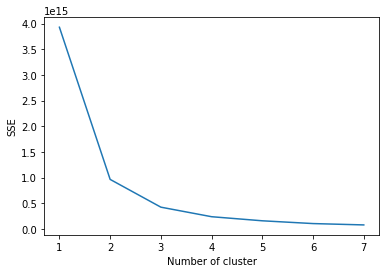

In [14]:
# PCA dekine benzer bir metod ile en uygun cluster sayısını bulmak üzere pca uygulanmış verimiz üzerinde
# K-Means Clustering uyguluyoruz.
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)
    # Cluster bilgisini DataFrame objesine ekliyoruz.
    df_scaled["clusters"] = pd.Series(kmeans.labels_)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [15]:
# Grafiğe göre 5 clusterdan sonra SSE değerimiz çok küçük miktarlarda oynadığı için 
# ideal olarak 5 cluster ile K-Means uyguluyoruz.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=1000).fit(df_scaled)
# Cluster bilgisini DataFrame objesine ekliyoruz.
df_scaled["clusters"] = pd.Series(kmeans.labels_)

In [16]:
# Her bir cluster için sonpasifsüre değerinin ortalamasını bul ve clusterMeans listesinde tut.
clstr = pd.Series(df_scaled["clusters"].values.ravel())
clusterMeans = df_scaled.groupby(clstr).sonpasifsüre.mean().values
clusterMeans

array([0.20557739, 0.16474279, 0.19748478, 0.1885005 , 0.21757715])

In [18]:
# Her bir cluster için ayrı dataframe oluştur
clusterDict = {k: v for k, v in df_scaled.groupby(clstr)}

# Churn Analysis

In [24]:
# Her bir cluster için churn değerini bulacak fonksiyon
def churn(dict,cluster):
    pasifSüre = dict[cluster]["sonpasifsüre"].values.ravel()
    churn = []
    for i in pasifSüre:
        if i > clusterMeans[cluster]:
            churn.append(1)
        else:
            churn.append(0)
    return churn

In [26]:
# Her bir cluster için churn değerlerinin olduğu bir dataframe oluştur.
churn0 = pd.DataFrame(churn(clusterDict,0),columns=["churn"])
churn1 = pd.DataFrame(churn(clusterDict,1),columns=["churn"])
churn2 = pd.DataFrame(churn(clusterDict,2),columns=["churn"])
churn3 = pd.DataFrame(churn(clusterDict,3),columns=["churn"])
churn4 = pd.DataFrame(churn(clusterDict,4),columns=["churn"])

In [27]:
# Churn değerlerini ilgili oldukları dataframe objesine ekle.
clusterDict[0]["churn"] = churn0.iloc[:,0].values
clusterDict[1]["churn"] = churn1.iloc[:,0].values
clusterDict[2]["churn"] = churn2.iloc[:,0].values
clusterDict[3]["churn"] = churn3.iloc[:,0].values
clusterDict[4]["churn"] = churn4.iloc[:,0].values
clusterDict[0].head()

,musteriref,MailOptIn,smsoptIn,siparişsayısı,ürünsayı,toplamtutar,ömür,aktifliksüresi,sonpasifsüre,indirimli,...,CK1,CK4,CK6,CU1,CU4,CU6,ET,EV,clusters,churn
74261,523171,1,0,0.250,0.101961,0.201421,-0.759825,-0.310429,1.025773,0.056452,...,0.000000,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0,1
74262,523221,1,1,-0.375,-0.333333,-0.360601,-0.759825,-0.377914,0.963918,-0.322581,...,0.000000,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,0,1
74263,523277,1,0,1.250,0.054902,-0.046816,-0.759825,0.024540,-0.381443,0.298387,...,4.333333,0.6,2.0,0.0,0.000000,0.0,0.0,1.0,0,0
74264,523324,0,0,-0.375,-0.301961,-0.312400,-0.759825,-0.305521,1.005155,-0.322581,...,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0,1
74265,523381,1,0,-0.375,-0.290196,-0.326001,-0.759825,-2.100613,-0.252577,-0.274194,...,4.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0


Text(0.5,1,'Correlation Heatmap')

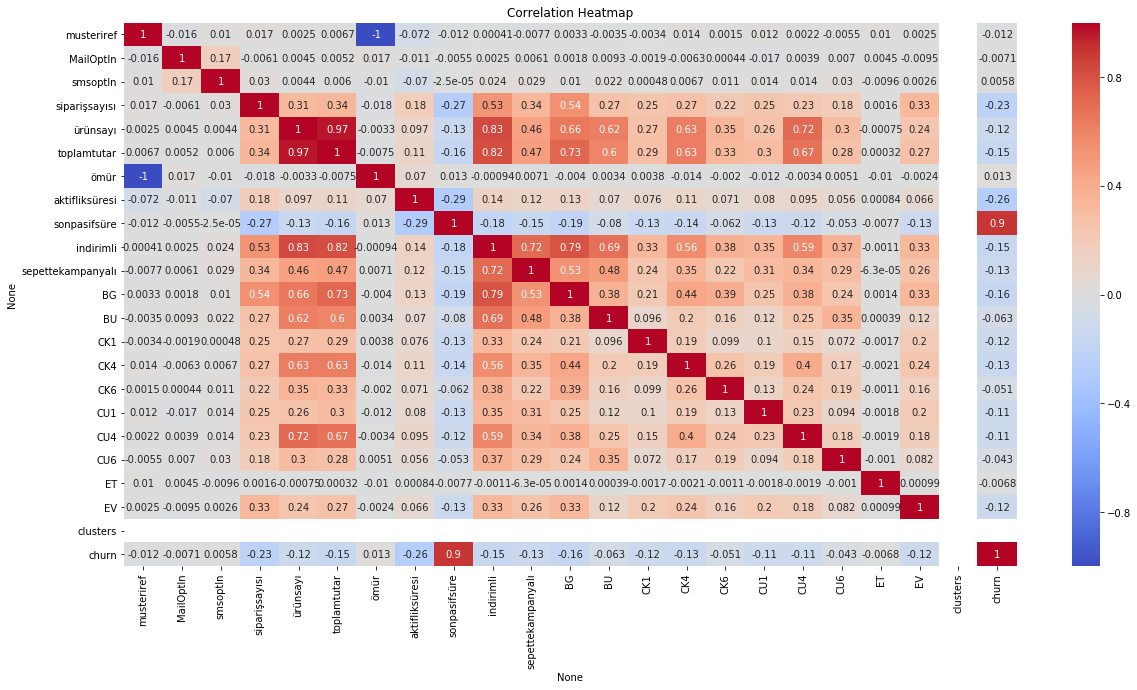

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(clusterDict[0].corr(),cmap="coolwarm",annot=True)
plt.title("Correlation Heatmap")

## Train-Test Splitting

In [29]:
from sklearn.model_selection import train_test_split
X = clusterDict[0].drop(["musteriref","clusters","churn","sonpasifsüre"],axis=1)
y = clusterDict[0]["churn"].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:2530: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


# Random Forest Classification for Churn Prediction

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
forestpreds = rfc.predict(X_test)
print(confusion_matrix(y_test,forestpreds))

[[2328  490]
 [ 374 1968]]


In [35]:
print(classification_report(y_test,forestpreds))

             precision    recall  f1-score   support

          0       0.86      0.83      0.84      2818
          1       0.80      0.84      0.82      2342

avg / total       0.83      0.83      0.83      5160



# Logistic Regression for Churn Prediction

In [38]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
predictions = lm.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[2135  683]
 [ 823 1519]]


In [40]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.72      0.76      0.74      2818
          1       0.69      0.65      0.67      2342

avg / total       0.71      0.71      0.71      5160



# SVMs for Churn Prediction

In [41]:
from sklearn.svm import SVC
svc = SVC(gamma=10)
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
preds = svc.predict(X_test)

In [43]:
print(confusion_matrix(y_test,preds))

[[2608  210]
 [1395  947]]


In [44]:
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

          0       0.65      0.93      0.76      2818
          1       0.82      0.40      0.54      2342

avg / total       0.73      0.69      0.66      5160



# Neural Networks for Churn Prediction

In [45]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2))
clf.fit(X_train, y_train)   

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [46]:
neuralpreds = clf.predict(X_test)
print(confusion_matrix(y_test,neuralpreds))

[[2198  620]
 [ 516 1826]]


In [47]:
print(classification_report(y_test,neuralpreds))

             precision    recall  f1-score   support

          0       0.81      0.78      0.79      2818
          1       0.75      0.78      0.76      2342

avg / total       0.78      0.78      0.78      5160



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

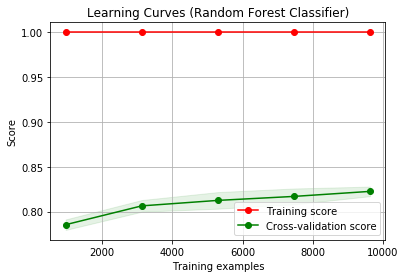

In [48]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(n_estimators=300)
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=4)

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=10)
#plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=4)